# Integración numérica
## Ejemplo usando Regla del Trapecio
Estimar la integral de la ecuación $f(x)=0.2+25x-200x^2+675x^3-900x^4+400x^5$ entre los valores $a=0$ y $b=0.8$

In [1]:
import numpy as np

# Definir la función f(x)
def f(x):
    return 0.2 + 25*x - 200*x**2 + 675*x**3 - 900*x**4 + 400*x**5

# Intervalo de integración
a = 0  # límite inferior
b = 0.8  # límite superior

# Número de subintervalos
n = 1

# Ancho del subintervalo
h = (b - a) / n

# valor inicial
I = 0

# Añadir los términos de los extremos
I = h * (f(a) + f(b)) / 2

# Mostrar el resultado
print(f'El valor aproximado de la integral es: {I:.4f}')

El valor aproximado de la integral es: 0.1728


In [2]:
# El valor verdadero 1.640533
true_value = 1.640533
error_percent = round(abs(I - true_value) / true_value * 100, 1)

print(f'El error porcentual: {error_percent:.1f}% con {n} pasos')

El error porcentual: 89.5% con 1 pasos


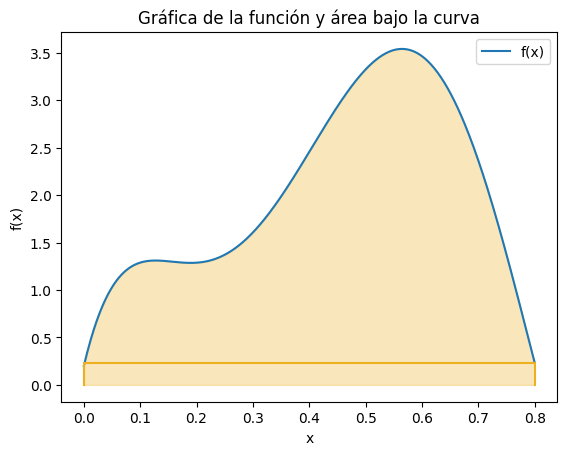

In [5]:
# Graficar la función
import matplotlib.pyplot as plt
x = np.linspace(0, 0.8, 400)
y = f(x)

plt.figure()
plt.plot(x, y, label='f(x)')
plt.fill_between(x, 0, y, where=(x >= 0) & (x <= b), color=[0.9290, 0.6940, 0.1250], alpha=0.3)
plt.plot([0, 0, b, b], [0, f(b), f(b), 0], color=[0.9290, 0.6940, 0.1250])

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfica de la función y área bajo la curva')
plt.legend()
plt.show()

## Aplicación de la Regla del Trapecio múltiple

El valor aproximado de la integral es: 1.8286
El error porcentual: 11.5% con 3 pasos


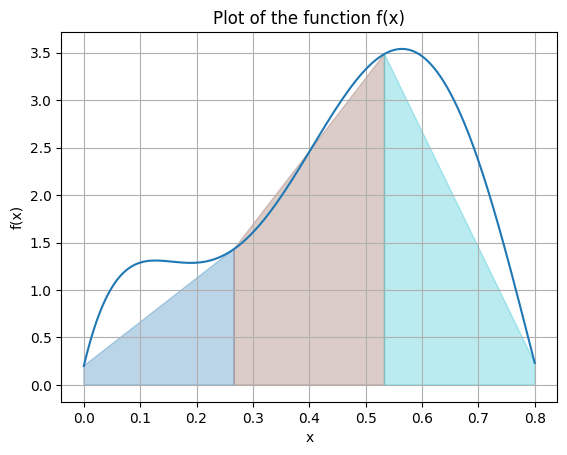

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función f(x) nuevamente para el segundo caso
def f(x):
    return 0.2 + 25*x - 200*x**2 + 675*x**3 - 900*x**4 + 400*x**5

# Intervalo de integración
a = 0  # límite inferior
b = 0.8  # límite superior

# Número de subintervalos
n = 3

# Ancho del subintervalo
h = (b - a) / n

# valor inicial
I = 0

# Colores para cada subintervalo
colors = plt.get_cmap('tab10', n)

# Regla del trapecio
plt.figure()
for i in range(n):
    x_inf = a + i*h  # límite inf del subintervalo
    x_sup = x_inf + h  # límite sup del subintervalo

    # Coordenadas del trapecio
    x_trap = [x_inf, x_inf, x_sup, x_sup]
    y_trap = [0, f(x_inf), f(x_sup), 0]

    # Rellenar el área del trapecio con un color diferente
    plt.fill(x_trap, y_trap, color=colors(i), alpha=0.3)

    # Sumar la evaluación de la función en el punto medio del subintervalo
    I += f((x_inf + x_sup) / 2)

# Añadir los términos de los extremos
I = h * (0.5 * f(a) + I + 0.5 * f(b))

# Mostrar el resultado
print(f'El valor aproximado de la integral es: {I:.4f}')
# El valor verdadero 1.640533
print(f'El error porcentual: {abs(I-1.640533)/1.640533*100:.1f}% con {n} pasos')

# Graficar la función
x = np.linspace(a, b, 400)
y = f(x)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of the function f(x)')
plt.grid(True)
plt.show()

## Ejemplo usando Regla de Simpson 1/3

Int aprox con Simpson 1/3 es: 1.6389
El error porcentual: 0.1% con 4 pasos


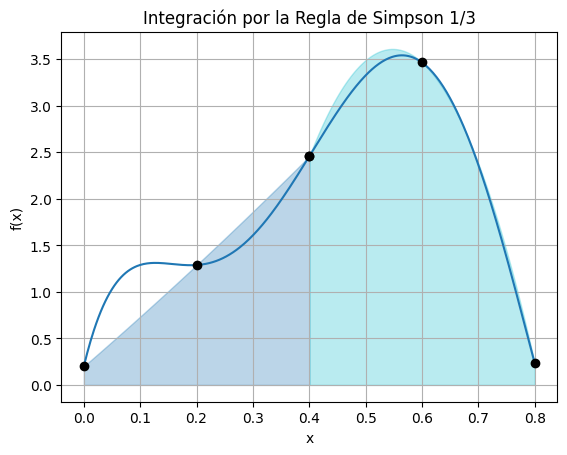

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función f(x)
def f(x):
    return 0.2 + 25*x - 200*x**2 + 675*x**3 - 900*x**4 + 400*x**5

# Intervalo de integración
a = 0  # límite inferior
b = 0.8  # límite superior

# Número de subintervalos (debe ser par para Simpson 1/3)
n = 4  # Asegúrate de que n sea par

# Anchura de subintervalo
h = (b - a) / n

# Inicializar la suma
I = f(a) + f(b)

# Colores para cada subintervalo
colors = plt.get_cmap('tab10', n // 2)

# Graficar la función
plt.figure()
plt.plot(np.linspace(a, b, 400), f(np.linspace(a, b, 400)))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Integración por la Regla de Simpson 1/3')

# Aplicar la regla de Simpson 1/3 y rellenar áreas
for i in range(0, n-1, 2):
    x0 = a + i*h
    x1 = x0 + h
    x2 = x1 + h
    
    # Sumar las evaluaciones de la función
    I += 4*f(x1) + 2*f(x2)
    
    # Coordenadas del área
    x_fill = np.linspace(x0, x2, 100)
    # Parábola ajustada
    A = f(x0)
    B = f(x1)
    C = f(x2)
    y_fill = ((x_fill - x1) * (x_fill - x2)) / ((x0 - x1) * (x0 - x2)) * A + \
             ((x_fill - x0) * (x_fill - x2)) / ((x1 - x0) * (x1 - x2)) * B + \
             ((x_fill - x0) * (x_fill - x1)) / ((x2 - x0) * (x2 - x1)) * C
    
    plt.fill_between(x_fill, y_fill, color=colors(i // 2), alpha=0.3)
    
    # Dibujar los puntos de la partición
    plt.plot([x0, x1, x2], [f(x0), f(x1), f(x2)], 'ko', markerfacecolor='k')

# Corregir la última suma (el último término 2*f(x2) no debe sumarse)
I -= f(x2)

# Multiplicar por h/3
I = (h/3) * I

# Mostrar el resultado
print(f'Int aprox con Simpson 1/3 es: {I:.4f}')
# El valor verdadero 1.640533
print(f'El error porcentual: {abs(I-1.640533)/1.640533*100:.1f}% con {n} pasos')

plt.grid(True)
plt.show()